In [1]:
import signal_ana as ana
%load_ext autoreload
%autoreload 2

In [2]:
# Load the signals
df = ana.load_signals('features_30.h5')

In [3]:
# Scale to 0 mean and unit variance
ana.normalize(df, 'waveform')
ana.normalize(df, 'lpc_coeff')
ana.normalize(df, 'amplitude')

In [4]:
# Exclude the eruption days
eruption_days = [ '2019-07-03','2019-08-11', '2019-08-29']
df = ana.exclude_days(df, eruption_days)

In [5]:
# Select a test period
df_test = ana.test_period(df)

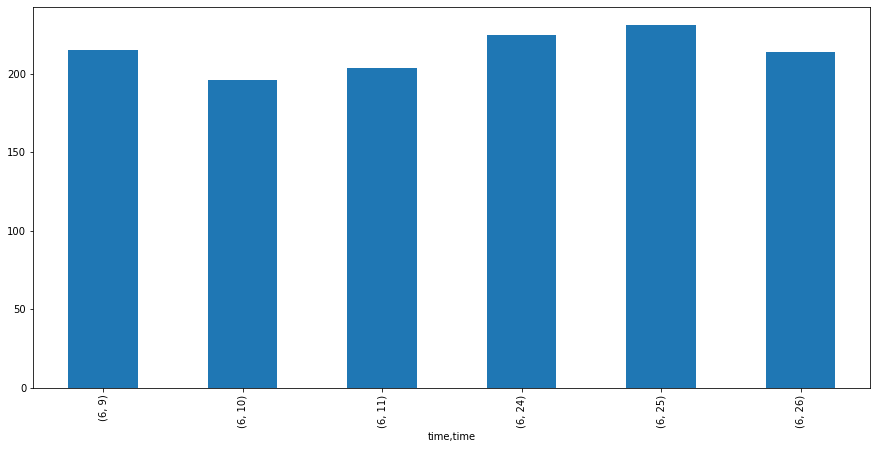

In [6]:
# Frequency of signals per day
ana.plot_freq(df_test)

In [7]:
features = ana.get_features(df, lpc=False, amp=False)

In [ ]:
# Train som
size = 12
niter = 1000000
sigma = 5 #0.3
learning_rate=.5
pca=True
random_seed = 1

som = ana.run_som(features, size, niter = niter, sigma=sigma, learning_rate=learning_rate, 
                  pca=pca, plot_error = True, random_seed = random_seed)

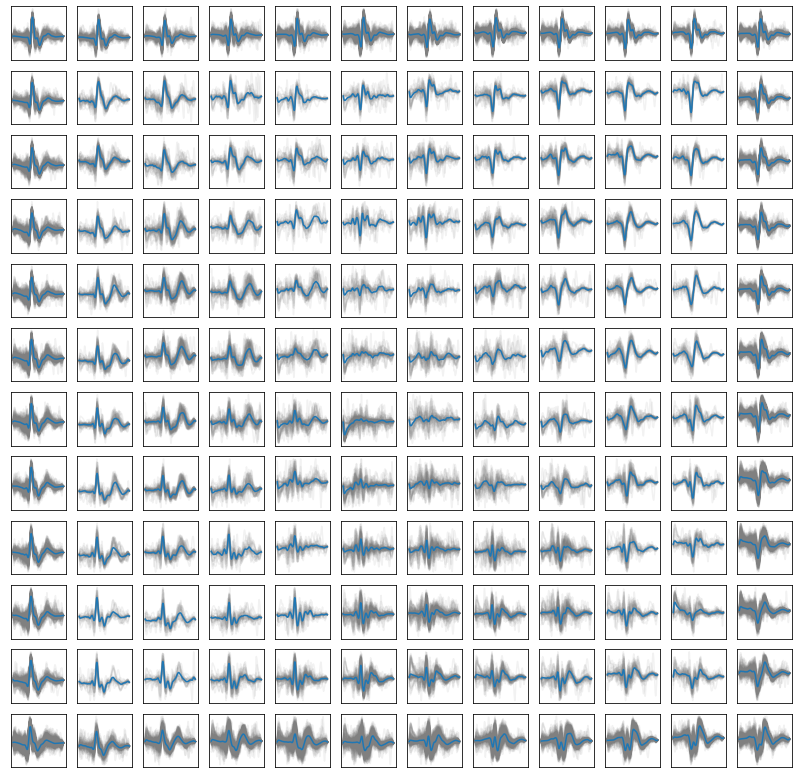

In [40]:
ana.plot_waveforms(features, som, size )

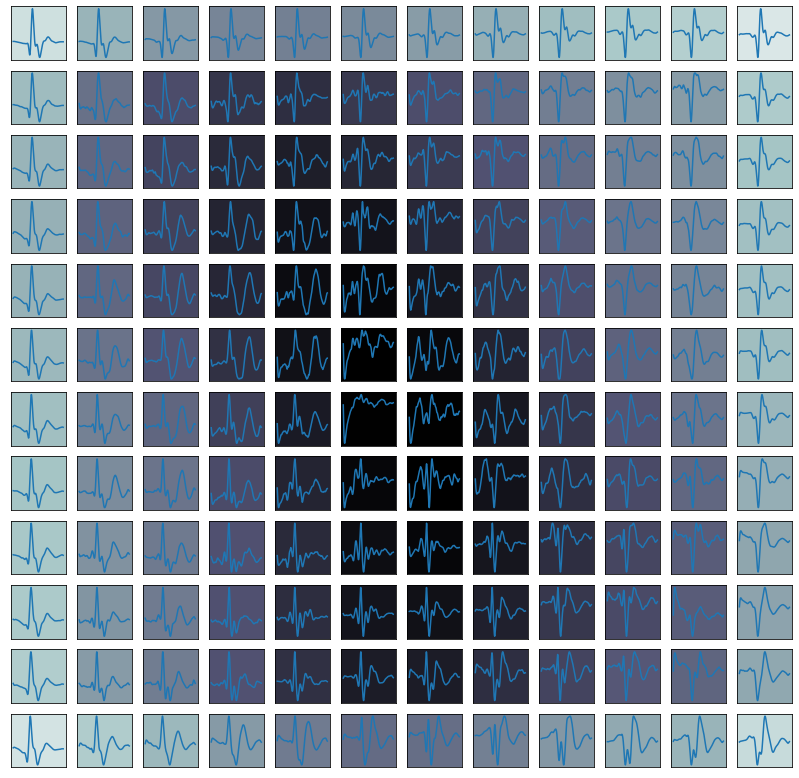

In [41]:
ana.plot_dmap(features, som, size)

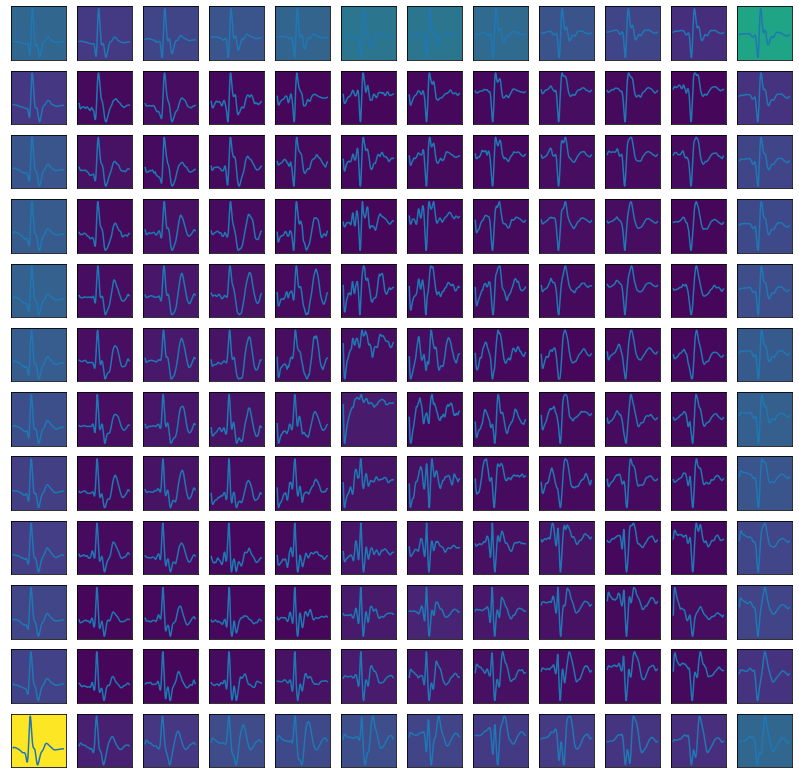

In [42]:
ana.plot_density(features, som, size )

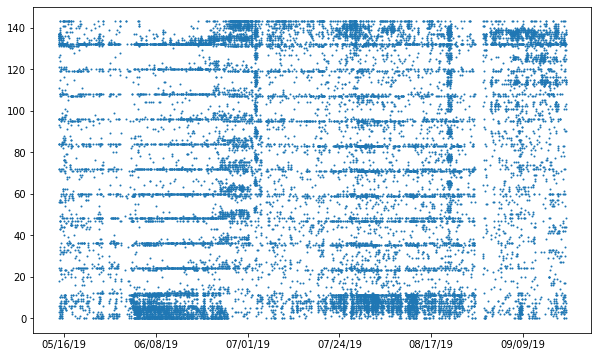

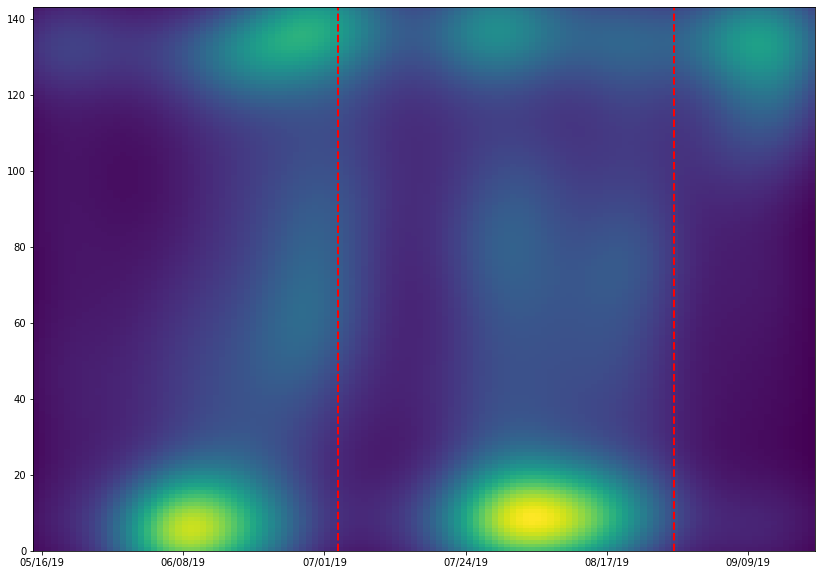

In [43]:
ana.plot_evo(df, som, size)